## 🦠 E Coli Protein Localization Site Prediction

Given *data about E. Coli*, let's try to predict the **localization site** of proteins. 

We will use a logistic regression model to make our predictions.

Data source: https://www.kaggle.com/datasets/kannanaikkal/ecoli-uci-dataset

### Importing Libraries

In [23]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('ecoli.csv')
data

,SEQUENCE_NAME,MCG,GVH,LIP,CHG,AAC,ALM1,ALM2,SITE
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
...,...,...,...,...,...,...,...,...,...
331,TREA_ECOLI,0.74,0.56,0.48,0.5,0.47,0.68,0.30,pp
332,UGPB_ECOLI,0.71,0.57,0.48,0.5,0.48,0.35,0.32,pp
333,USHA_ECOLI,0.61,0.60,0.48,0.5,0.44,0.39,0.38,pp
334,XYLF_ECOLI,0.59,0.61,0.48,0.5,0.42,0.42,0.37,pp


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SEQUENCE_NAME  336 non-null    object 
 1   MCG            336 non-null    float64
 2   GVH            336 non-null    float64
 3   LIP            336 non-null    float64
 4   CHG            336 non-null    float64
 5   AAC            336 non-null    float64
 6   ALM1           336 non-null    float64
 7   ALM2           336 non-null    float64
 8   SITE           336 non-null    object 
dtypes: float64(7), object(2)
memory usage: 23.8+ KB


### Preprocessing

In [4]:
df = data.copy()

In [5]:
df

,SEQUENCE_NAME,MCG,GVH,LIP,CHG,AAC,ALM1,ALM2,SITE
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
...,...,...,...,...,...,...,...,...,...
331,TREA_ECOLI,0.74,0.56,0.48,0.5,0.47,0.68,0.30,pp
332,UGPB_ECOLI,0.71,0.57,0.48,0.5,0.48,0.35,0.32,pp
333,USHA_ECOLI,0.61,0.60,0.48,0.5,0.44,0.39,0.38,pp
334,XYLF_ECOLI,0.59,0.61,0.48,0.5,0.42,0.42,0.37,pp


In [6]:
len(df['SEQUENCE_NAME'].unique())

336

In [7]:
# Drop SEQUENCE_NAME column
df = df.drop('SEQUENCE_NAME', axis=1)
df

,MCG,GVH,LIP,CHG,AAC,ALM1,ALM2,SITE
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
...,...,...,...,...,...,...,...,...
331,0.74,0.56,0.48,0.5,0.47,0.68,0.30,pp
332,0.71,0.57,0.48,0.5,0.48,0.35,0.32,pp
333,0.61,0.60,0.48,0.5,0.44,0.39,0.38,pp
334,0.59,0.61,0.48,0.5,0.42,0.42,0.37,pp


In [8]:
# Split df into X and y
y = df['SITE'].copy()
X = df.drop('SITE', axis=1).copy()

In [9]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

In [18]:
y_train.value_counts()

SITE
cp     98
im     53
pp     32
imU    28
om     15
omL     5
imL     2
imS     2
Name: count, dtype: int64

In [13]:
y_test.value_counts()

SITE
cp     45
im     24
pp     20
imU     7
om      5
Name: count, dtype: int64

Last two sites "imL" and "imS" are not present in y_test, so including them in y_train is foolish. 

In [15]:
y_train.value_counts().drop('cp').sum()

137

In [17]:
# Simplifying target column
df['SITE'] = df['SITE'].apply(lambda x: x if x=='cp' else 'other')

In [19]:
# Redefining X and y, then train-test split
y = df['SITE'].copy()
X = df.drop('SITE', axis=1).copy()

In [20]:
# Train test split on new target column
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

In [21]:
X_train.mean()

MCG     0.511064
GVH     0.499362
LIP     0.499915
CHG     0.502128
AAC     0.503915
ALM1    0.509915
ALM2    0.501106
dtype: float64

In [22]:
X_train.describe()

,MCG,GVH,LIP,CHG,AAC,ALM1,ALM2
count,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000
mean,0.511064,0.499362,0.499915,0.502128,0.503915,0.509915,0.501106
std,0.198738,0.142568,0.100009,0.032616,0.123683,0.214115,0.213124
min,0.000000,0.160000,0.480000,0.500000,0.060000,0.050000,0.000000
25%,0.350000,0.400000,0.480000,0.500000,0.420000,0.340000,0.345000
50%,0.520000,0.480000,0.480000,0.500000,0.500000,0.470000,0.430000
75%,0.680000,0.560000,0.480000,0.500000,0.575000,0.710000,0.730000
max,0.880000,1.000000,1.000000,1.000000,0.880000,1.000000,0.990000


In [24]:
# Scale X
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns=X_test.columns)

In [25]:
X_train.describe()

,MCG,GVH,LIP,CHG,AAC,ALM1,ALM2
count,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000
mean,0.580754,0.404002,0.038298,0.004255,0.541360,0.484121,0.506168
std,0.225838,0.169724,0.192324,0.065233,0.150833,0.225384,0.215277
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.397727,0.285714,0.000000,0.000000,0.439024,0.305263,0.348485
50%,0.590909,0.380952,0.000000,0.000000,0.536585,0.442105,0.434343
75%,0.772727,0.476190,0.000000,0.000000,0.628049,0.694737,0.737374
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Training

In [26]:
model = LogisticRegression()
model.fit(X_train, y_train)

print("Test Accuracy: {:.2f}%".format(model.score(X_test, y_test)*100))

Test Accuracy: 97.03%


In [29]:
model.classes_

array(['cp', 'other'], dtype=object)

In [27]:
y_pred = model.predict(X_test)
y_pred

array(['cp', 'cp', 'other', 'other', 'other', 'cp', 'cp', 'cp', 'other',
       'other', 'cp', 'other', 'cp', 'other', 'other', 'other', 'cp',
       'cp', 'other', 'other', 'cp', 'cp', 'other', 'other', 'cp',
       'other', 'other', 'other', 'other', 'other', 'cp', 'cp', 'other',
       'cp', 'cp', 'other', 'other', 'other', 'other', 'other', 'cp',
       'other', 'cp', 'cp', 'other', 'cp', 'other', 'other', 'other',
       'other', 'cp', 'cp', 'cp', 'cp', 'other', 'other', 'cp', 'other',
       'cp', 'other', 'cp', 'other', 'other', 'cp', 'cp', 'other', 'cp',
       'cp', 'other', 'other', 'other', 'other', 'other', 'other', 'cp',
       'other', 'cp', 'other', 'cp', 'cp', 'cp', 'cp', 'cp', 'other',
       'other', 'cp', 'other', 'other', 'other', 'cp', 'other', 'other',
       'cp', 'cp', 'other', 'other', 'other', 'other', 'cp', 'other',
       'cp'], dtype=object)

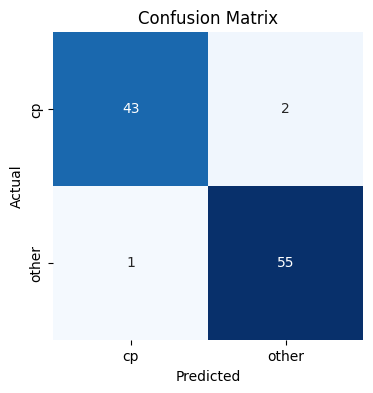

In [30]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, vmin=0, cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(np.arange(2) + 0.5, model.classes_)
plt.yticks(np.arange(2) + 0.5, model.classes_)
plt.title("Confusion Matrix")
plt.show()

In [34]:
## Using StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [35]:
X_train

,MCG,GVH,LIP,CHG,AAC,ALM1,ALM2
230,1.204834,-0.909305,-0.199557,-0.065372,1.102624,0.889665,1.123306
233,0.751010,-0.136097,-0.199557,-0.065372,0.292378,0.889665,1.123306
318,0.751010,1.480611,-0.199557,-0.065372,-0.760941,-0.046405,-0.710520
17,-0.358339,-1.612221,-0.199557,-0.065372,0.373403,0.047202,0.370967
332,1.003135,0.496528,-0.199557,-0.065372,-0.193769,-0.748458,-0.851584
...,...,...,...,...,...,...,...
203,-0.812164,0.074778,-0.199557,-0.065372,0.859550,0.936469,1.123306
255,1.759509,0.355945,-0.199557,-0.065372,1.021599,1.404504,1.546497
72,-0.711314,0.004487,-0.199557,-0.065372,-0.679917,-0.701655,-0.240308
235,1.255259,1.480611,-0.199557,-0.065372,-0.031720,0.936469,1.170327


In [36]:
X_train.describe()

,MCG,GVH,LIP,CHG,AAC,ALM1,ALM2
count,2.350000e+02,2.350000e+02,2.350000e+02,2.350000e+02,2.350000e+02,2.350000e+02,2.350000e+02
mean,-5.480250e-17,-1.946434e-16,-7.275504e-17,3.779483e-17,5.272378e-16,2.286587e-16,2.926737e-16
std,1.002134e+00,1.002134e+00,1.002134e+00,1.002134e+00,1.002134e+00,1.002134e+00,1.002134e+00
min,-2.577037e+00,-2.385429e+00,-1.995570e-01,-6.537205e-02,-3.596802e+00,-2.152564e+00,-2.356262e+00
25%,-8.121635e-01,-6.984297e-01,-1.995570e-01,-6.537205e-02,-6.799169e-01,-7.952617e-01,-7.340308e-01
50%,4.506059e-02,-1.360966e-01,-1.995570e-01,-6.537205e-02,-3.172026e-02,-1.868158e-01,-3.343507e-01
75%,8.518597e-01,4.262365e-01,-1.995570e-01,-6.537205e-02,5.759641e-01,9.364690e-01,1.076285e+00
max,1.860359e+00,3.519069e+00,5.011099e+00,1.529706e+01,3.047214e+00,2.293771e+00,2.298836e+00


In [37]:
model2 = LogisticRegression()
model2.fit(X_train, y_train)

print("Test Accuracy: {:.2f}%".format(model2.score(X_test, y_test)*100))

Test Accuracy: 98.02%


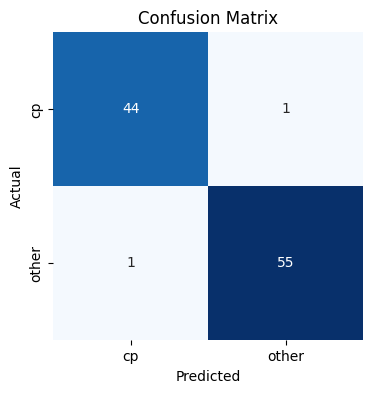

In [40]:
y_pred = model2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, vmin=0, cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(np.arange(2) + 0.5, model2.classes_)
plt.yticks(np.arange(2) + 0.5, model2.classes_)
plt.title("Confusion Matrix")
plt.show()